In [1]:
import torch 
import numpy as np 
import torch.nn as nn 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# import Hand Written MNIST dataset
from torchvision import datasets, transforms

train = datasets.MNIST("data/", train = True,  download = True, transform=transforms.Compose([transforms.ToTensor()]))
test  = datasets.MNIST("data/", train = False, download = True, transform=transforms.Compose([transforms.ToTensor()]))


In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset  = torch.utils.data.DataLoader(test,  batch_size = 10, shuffle = True)

In [4]:
type(trainset)

torch.utils.data.dataloader.DataLoader

In [5]:
# This corresponds to first batches of images and labels
for data in trainset:
    print(data)
    break 

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

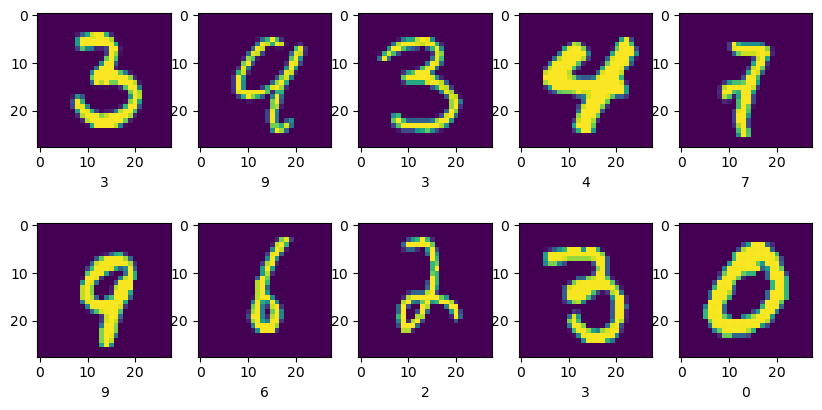

In [6]:
plt.figure(figsize = (10,5))
j = 0
for i in range(10):
    j = j+1 
    image, label = data[0][i], data[1][i]
    image = image.permute(1,2,0)
    plt.subplot(2,5, j)
    plt.imshow(image)
    plt.xlabel(label.item())
plt.show()


In [7]:
import torch.nn.functional as F 

class FeedForwardNeuralNetwork(nn.Module):
    def __init__(self):
        super(FeedForwardNeuralNetwork, self).__init__()
        
        #Dense hidden layer
        self.layer1 = nn.Linear(in_features=28*28, out_features=64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 10)
        
    
    def forward(self, x):
        
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)
        
        return F.log_softmax(x, dim =1)       

In [8]:
test_model = FeedForwardNeuralNetwork()
print(test_model)

FeedForwardNeuralNetwork(
  (layer1): Linear(in_features=784, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=10, bias=True)
)


In [9]:
# Testing the model

x = torch.rand((28*28))
x = x.view([-1,28*28])
output = test_model(x)
output

tensor([[-2.1387, -2.0976, -2.2747, -2.3536, -2.3782, -2.5228, -2.2280, -2.2119,
         -2.3977, -2.5199]], grad_fn=<LogSoftmaxBackward0>)

In [10]:
#Initzilize the model

model = FeedForwardNeuralNetwork()

In [11]:
def train(lr = 0.01, epochs = 5):
    
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)
    
    for epoch in range(epochs):
        running_loss = 0 
        for data in tqdm(trainset):
            
            input_data, label = data
            
            #flatten the data
            input_data = input_data.view(-1, 28*28)
    
            
            #zero the gradient
            model.zero_grad()
            
            # initilize the model
            output = model(input_data)
            
            # loss
            loss = F.nll_loss(output, label)
            
            # backward propagation
            loss.backward()
            
            
            #optimization
            optimizer.step()
            
            running_loss += loss.item()
          
        print(f'Epoch: {epoch+1}, loss: {running_loss/len(trainset)}')

In [12]:
train(lr=0.01,epochs = 3)

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:16<00:00, 354.13it/s]


Epoch: 1, loss: 0.3622302220639491


100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:22<00:00, 272.11it/s]


Epoch: 2, loss: 0.26193343022888804


100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:22<00:00, 272.72it/s]

Epoch: 3, loss: 0.23129383147590685


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        input_data, label = data 
        output= model(input_data.view(-1, 28*28))

        for idx, i in enumerate(output):
            
            if torch.argmax(i) == label[idx]:
                correct += 1
            total += 1
            
            
print(f'Accuracy:{correct/total}')

Accuracy:0.9496
